# 1. Creating a set of 2D data points

In the first exercise we will modify the data module to include the class `Random2DGaussian` which will enable us to sample random 2D data by using Gaussian random distribution. The class constructor should create parameters of a bivariate Gaussian random distribution (vector `μ` and matrix `Σ`). The `methodget_sample(n)` should return `n` randomly sampled 2D data points represented as a numpy matrix with dimensions `Nx2`. Distribution variance and the allowed range of values should be fixed.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Steps:

- Define the allowed range of values for both dimensions (e.g. `minx=0, maxx=10, miny=0, maxy=10`); and store them as class parameters.
- Randomly select the distribution mean mi using a uniform distribution (`np.random.random_sample`).
- Randomly select the eigenvalues of the covariance matrix `Σ` using uniform distribution and store them into a diagonal matrix `D`. Have the limits on allowed range of the eigenvalues depend on the allowed range of mean values `μ`, e.g.:
  
  `eigvalx = (np.random.random_sample()*(maxx - minx)/5)**2`
  
  
- Randomly select an angle of rotation of the covariation matrix and using that angle define a rotation matrix `R=[cos(φ) −sin(φ); sin(φ) cos(φ)]`.
- The covariance matrix `Σ` is the dot product of the transposed matrix `R`, matrix `D` and matrix `R`
- To sample data use the function `np.random.multivariate_normal`.
- To have your experiment be repeatable, use a fixed seed for the `numpy` random generator:


In [2]:
np.random.seed(100)

In [3]:
class Random2DGaussian():
    def __init__(self):
        # [ [minx, maxx], [miny, maxy] ]
        xy = np.array([[0, 10], [0, 10]])

        self.mean = [xy[i][0]+np.random.random_sample()*(xy[i][1]-xy[i][0]) for i in range(2)]
        D = np.diag((np.random.random_sample(2)*(xy[0][1]-xy[0][0], xy[1][1]-xy[1][0]))**2)
        angle = np.random.random_sample()*2*np.pi
        R = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
        self.sigma = np.dot(np.dot(np.transpose(R), D), R)
    
    def get_sample(self, n):
        return np.random.multivariate_normal(self.mean, self.sigma, n)


Use the following code to test your implementation: 

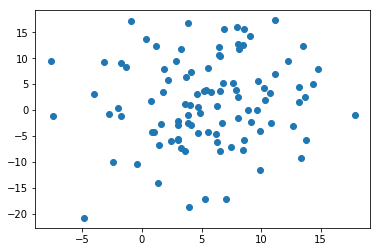

In [4]:
np.random.seed(100)
G = Random2DGaussian()
X = G.get_sample(100)
plt.scatter(X[:,0], X[:,1])
plt.show()

# 2. Learning binary logistic regression using gradient descent

Implemet a method `binlogreg_train` which takes in a training set and learns the parameters *w* and *b* of binary logistic regression. Use the names:

 - `X`: the matrix containing the training set, it has the dimensions of `NxD`
 - `Y_`: the vector containing the true classes for the training examples, it has the dimensions `Nx1` (to be used during training)
 - `Y`: the vector of predicted classes for the training examples, it has the dimensions `Nx1` (to be used during evaluation) 


Have the function have the following interface:

```python
def binlogreg_train(X,Y_):
    '''
    Arguments
        X:  data, np.array NxD
        Y_: class indices, np.array Nx1
    Return values
        w, b: parameters of binary logistic regression
    '''
```
Steps:
- Initialize w using normal distribution `N(0,1)` (`np.random.randn`) and have *b* be 0
- Start the gradient descent loop. Let the number of iterations `param_niter` be a training hyperparameter:
 - calculate classification scores for the entire training set using numpy operations (`scores = np.dot(X, w) + b`).
 - calculate a posteriori probabilities for each class and for every training example `P(c_1|X)` using numpy operations
 - calculate the total loss `L(w,b)` using `numpy` operations
 - calculate the gradients `grad_w` and `rad_b` using `numpy` operations
 - modify the parameters `w` and `b` by moving them into the direction of the negative loss gradient, have `param_delta` be a training hyperparameter 

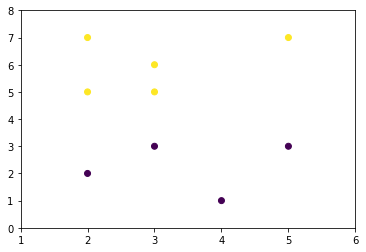

iteration 0: loss 0.7263592294539114
iteration 100: loss 0.05384922083373246
iteration 200: loss 0.03039171234862975
iteration 300: loss 0.021082001544813694
iteration 400: loss 0.01610816638816229
iteration 500: loss 0.013020885868414895
iteration 600: loss 0.010920797402098493
iteration 700: loss 0.009400922292306246
iteration 800: loss 0.008250602949034866
iteration 900: loss 0.007349988774272779
iteration 1000: loss 0.006625918692232811
w [-4.47203078  4.35865825]
b -3.6157251424813324
h [ -3.8424702   -3.95584273 -17.14519002 -12.8999043    9.23350456
  17.95082106   4.76147377   9.12013203   4.53472871]
s [9.79009476e-01 9.81217024e-01 9.99999964e-01 9.99997502e-01
 9.77006582e-05 1.59976967e-08 8.48046159e-03 1.09428252e-04
 1.06159109e-02]
s>0.5 [False False False False  True  True  True  True  True]
[0 0 0 0 1 1 1 1 1]


In [61]:
import sklearn.metrics

def binlogreg_train(X,Y_, param_niter=1000, param_delta=0.1):
    '''
    Arguments
        X:  data, np.array NxD
        Y_: class indices, np.array Nx1
    Return values
        w, b: parameters of binary logistic regression
    '''
    param_niter += 1 # to print last error
    w = np.random.randn(X.shape[1]) # weights == == columns == number of features
    b = 0.0
    # gradient descent (param_niter iteratons)
    for i in range(param_niter):
        # classification scores
        scores = np.dot(X, w)+b

        #P(Y=c_1|x)=σ(w⊤x+b), where σ(s)=exp(s)/(1+exp(s))
        probs = np.exp(scores)/(1.0+np.exp(scores)) # N x 1
        #probs = 1/(1+np.exp(-scores))
        
        # loss
        loss = sklearn.metrics.log_loss(Y_, probs)# scalar
        # trace
        if i % int(param_niter/10) == 0:
            print("iteration {}: loss {}".format(i, loss))
        
        # derivative of the loss funciton with respect to classification scores
        dL_dscores = probs - Y_ # N x 1

        # gradijents with respect to parameters
        grad_w = 1/(X.shape[1]) * np.dot(dL_dscores, X) # D x 1
        grad_b = 1/(X.shape[1]) * np.sum(dL_dscores) # 1 x 1

        # modifying the parameters
        w += -param_delta * grad_w
        b += -param_delta * grad_b
    return (w, b)

# sample data set
X = np.array([[2,2], [3,3], [4,1], [5,3], [2,5], [2,7], [3,5], [3,6], [5,7]])
y = np.array([0,0,0,0,1,1,1,1,1])
plt.scatter(X[:,0], X[:,1], c=y)
plt.xticks(range(1,7))
plt.yticks(range(0,9))
plt.show()

w, b = binlogreg_train(X, y)
print('w',w)
print('b',b)

h=np.dot(X,w.transpose())+b
print('h',h)
def s(x):
    return 1/(1+np.exp(x))
def s2(x):
    exp_x_shifted = np.exp(x - np.max(x))
    probs = exp_x_shifted / np.sum(exp_x_shifted)
    return probs
print('s',s(h))
print('s>0.5',s(h)<0.5)
print(y)

Implement the function `binlogreg_classify` which takes in a set of data points and classifies using logistic regression parameters. Have the function have the following interface: 

In [6]:
def binlogreg_classify(X, w, b):
    '''
      Arguments
          X:    data, np.array NxD
          w, b: logistic regression parameters

      Return values
          probs: a posteriori probabilities for c1, dimensions Nx1
    '''
    #P(Y=c_1|x)=σ(w⊤x+b), where σ(s)=exp(s)/(1+exp(s))
    es = np.exp(np.dot(X, w)+b)
    return es/(1+es)
    

print('classes:\nestim.\torig.')
for i, v in enumerate(binlogreg_classify(X, w, b)):
    print('{:.3f}\t{}'.format(v, y[i]))

classes:
estim.	orig.
0.021	0
0.019	0
0.000	0
0.000	0
1.000	1
1.000	1
0.992	1
1.000	1
0.989	1


Implement the function `sample_gauss_2d(C, N)` which creates `C` Gaussian random distributions, and from each created distribution samples N data points. The function should return the matrix X with dimensions `(C·N)x2` where the rows correspond to the sampled data points, and the matrix of true classes Y with dimensions `(C·N)x2` which contains indices of the classes to which the corresponding points belong. For example, if the i-th row of `X` was sampled from the j-th distribution, then the following must hold: `Y[i,0]==j`. 

X.shape (45, 2)
Y.shape (45,)


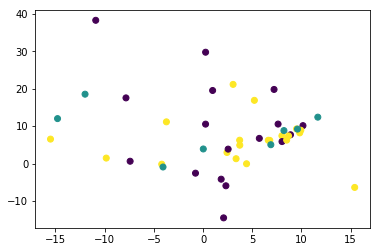

In [7]:
def sample_gauss_2d(C, N):
    '''
    C - number of classes
    N - number of data points assigned to specific class
    '''
    distributions = []
    for i in range(C):
        distributions.append(Random2DGaussian())
    
    X = np.vstack([d.get_sample(N) for d in distributions])
    Y_= np.random.randint(0, C, C*N)

    return X,Y_

X, Y = sample_gauss_2d(3,15)
print('X.shape', X.shape)
print('Y.shape', Y.shape)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()



Implement the function `eval_perf_binary(Y,Y_)` which takes in true classes and predicted classes and determines quantitative measures for evaluating classifier performance: accuracy, precision and recall. You can get these values by using the number of true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN). 

In [8]:
def eval_perf_binary(Y,Y_):
    tp = sum(np.logical_and(Y==Y_, Y_==True))
    fn = sum(np.logical_and(Y!=Y_, Y_==True))
    tn = sum(np.logical_and(Y==Y_, Y_==False))
    fp = sum(np.logical_and(Y!=Y_, Y_==False))
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn) / (tp+fn + tn+fp)
    return accuracy, recall, precision

Implement the function `eval_AP` which calculates the [average precision](https://en.wikipedia.org/wiki/Information_retrieval#Average_precision) of binary classification. The function takes in an array of true classes $Y_r$ which we get by sorting the matrix of true classes $Y$ using a posteriori probabilities $P(c_1|x)$. You can use `numpy` method `argsort` for sorting $Y$ to get $Y_r$. Average precision is calculated using the following expression: $AP=\frac{\sum^{N-1}_{i=0}{Precision(i) \cdot Y_{ri}}}{\sum^{N-1}_{i=0}{Y_{ri}}}$.

$Precision(i)$ is the precision you get if the data with index greater or equal to $i$ gets sorted to the class $c_1$ and the data with the index less than i gets sorted into the class $c_0$. Your function should have the following behaviour:

```
>>> import data
>>> data.eval_AP([0,0,0,1,1,1])
1.0
>>> data.eval_AP([0,0,1,0,1,1])
0.9166666666666666
>>> data.eval_AP([0,1,0,1,0,1])
0.7555555555555555
>>> data.eval_AP([1,0,1,0,1,0])
0.5
```

In [9]:
def _precision(Y, i):
    class_as_one = Y[i:]
    tp = (class_as_one == 1).sum()
    fp = (class_as_one == 0).sum()
    return tp / (tp + fp)

def eval_AP(Yr):
    Yr = np.array(Yr)
    return np.sum(_precision(Yr, i)*Yr[i] for i in range(len(Yr))) / np.sum(Yr)


data = (([0,0,0,1,1,1], 1.0), ([0,0,1,0,1,1], 0.9166666666666666), ([0,1,0,1,0,1], 0.7555555555555555), ([1,0,1,0,1,0], 0.5))
for v in data:
    print('data.eval_AP({}] = {}, expected = {}'.format(v[0], eval_AP(v[0]), v[1]))

data.eval_AP([0, 0, 0, 1, 1, 1]] = 1.0, expected = 1.0
data.eval_AP([0, 0, 1, 0, 1, 1]] = 0.9166666666666666, expected = 0.9166666666666666
data.eval_AP([0, 1, 0, 1, 0, 1]] = 0.7555555555555555, expected = 0.7555555555555555
data.eval_AP([1, 0, 1, 0, 1, 0]] = 0.5, expected = 0.5


Write a test for the module `binlogreg.py`. You can get your training set using `sample_gauss_2d`. After that call the training method and us the return parameters for classifying the training data. Convert the probabilities to get actual class predictions `Y` (try to do this without using a loop). Evaluate the performance of your classifier using `eval_perf_binary` and `eval_AP`.

In [10]:
if __name__=="__main__":
    np.random.seed(100)

    # get the training dataset
    X,Y_ = sample_gauss_2d(2, 50)

    # train the model
    w,b = binlogreg_train(X, Y_)

    # evaluate the model on the training dataset
    probs = binlogreg_classify(X, w,b)
    Y = np.array([1 if x>0.5 else 0 for x in probs])

    # report performance
    accuracy, recall, precision = eval_perf_binary(Y, Y_)
    AP = eval_AP(Y_[probs.argsort()])
    print (accuracy, recall, precision, AP)

iteration 0: loss 1.6331115827438902
iteration 100: loss 5.772971121507562
iteration 200: loss 13.708478473626528
iteration 300: loss 9.123240050600781
iteration 400: loss 14.287563015111202
iteration 500: loss 7.030939413783024
iteration 600: loss 13.637264357486524
iteration 700: loss 7.9204991462089
iteration 800: loss 11.922894116811321
iteration 900: loss 6.587416568316513
iteration 1000: loss 14.389990397574671
0.55 0.25 0.5714285714285714 0.5372702380899447


 If you cannot get 100% accuracy, try to find an explanation.

When you are satisfied that your implementation works, store your code into `binlogreg.py`. You should put the methods `sample_gauss_2d`, `eval_AP` and `eval_perf_binary` into the `data.py` module.

For those who want to do more:

- Perform gradient checking, that is to say check if the analytical gradients match their numerical approximations.
- Add regularization loss using L2 norm. In this case the modification to w is equal to the weight w multiplied with the hyperparameter param_lambda. The bias b needs not be regularized in most of the cases.s Don't forget to apply the modification to w.
- Experiment with different values of training hyperparameters param_niter, param_delta and param_lambda. Try to find a hyperparameter combination for which your implementation doesn't work. Try to explain why the solution doesn't work with those values.
- Try to find a way to visualize the loss function and the the optimization process itself.
- Try to determine the bias and the variance of your optimizer by performing multiple experiments on a test set. You can get the test set by sampling it from the same distribution from which the training set was sampled. Try to come up with a data distribution for which the classifier bias will be large. 

# 3. Visualizing the classification results

You can download the solution of this exercise [here](http://www.zemris.fer.hr/~ssegvic/du/src/data.py).

Implement the function `graph_data` which is used for visualizing the results of the binary classification of 2D data points. Have it implement the following interface:
```python
'''
  X  ... data (np. array Nx2)
  Y_ ... true classes (np.array Nx1)
  Y  ... predicted classes (np.array Nx1)
'''
```
Steps:

- Use plt.scatter to plot data. Use named arguments c and marker to cwspecify the colour, size and shape of the symbol used for representing data points
- Use colour to distinguish the two groundtruth classes: grey for class 0 and white for class 1
- Use circles to indicate the data points which were classified correctly (Y_==Y), and squares for indicating which data points were classified incorrectly. To avoid using loops in python, you can call plt.scatter twice - once for correctly classified data and one for incorrectly classified data. 


In [11]:
import matplotlib as mpl
def graph_data(X, Y_, Y):
    '''
    X  - data (np. array Nx2)
    Y_ - true classes (np.array Nx1)
    Y  - predicted classes (np.array Nx1)
    '''
    
    correct = Y_ == Y
    wrong = Y_ != Y
    
    plt.scatter(X[correct, 0], X[correct, 1], marker='o',
                c=['white' if x else 'grey' for x in Y_[correct]], edgecolors='black')
    plt.scatter(X[wrong, 0], X[wrong, 1], marker='s',
                c=['white' if x else 'grey' for x in Y_[wrong]], edgecolors='black')

Test your code using data sampled from 2 random distributions. For this initial testing you can get predicted classes `Y` using a dummy classifier e.g.:

In [12]:
def myDummyDecision(X):
    scores = X[:,0] + X[:,1] - 5
    return scores

Your test could now look something like this:

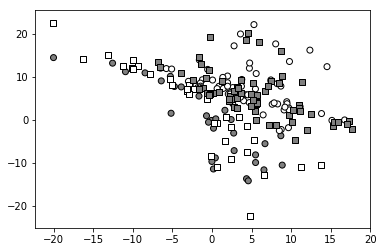

In [13]:
np.random.seed(100)

# get the training dataset
X,Y_ = sample_gauss_2d(2, 100)

# get the class predictions
Y = myDummyDecision(X)>0.5

# graph the data points
graph_data(X, Y_, Y) 

# show the results
plt.show()

# 4. Plotting the decision function

You can download the solution of this exercise [here](http://www.zemris.fer.hr/~ssegvic/du/src/data.py).

In practice the decision function of a classifier does not return the predicted class for the given data point as was the case with our `myDummyDecision`. For example, the decision function for the support vector machine returns classification score. The sign of the result determines the predicted class, while the border between the classed is a plane for which every pint has the classification score of zero. The binary logistic regression returns the a posteriori probability $P(Y=c_1|x)$. If that probability is greater than $0.5$, the classifier classifies the input into $c_1$. The border between the classes is a plane/line for which every point has the probability of $0.5$. The same interpretation can be given for decision function of deep models, but they can, unlike logistic regression, model non-linear borders between classes. The decision function of these classifiers can be visualised, that is qualitatively evaluated.

That is why we will now implement a way to visualize the decision function. The goal is to implement a method `graph_surface` which plots the surface of a scalar-valued function of 2D data. We will use this method to plot decision functions of our classifiers which work with 2D data. The interface of `graph_surface` should be the following: 

```python
'''
  fun    ... the decision function (Nx2)->(Nx1)
  rect   ... he domain in which we plot the data:
             ([x_min,y_min], [x_max,y_max])
  offset ... the value of the decision function
             on the border between the classes;
             we typically have:
             offset = 0.5 for probabilistic models
                (e.g. logistic regression)
             offset = 0 for models which do not squash 
                classification scores (e.g. SVM)
  width,height ... rezolucija koordinatne mreže
'''
```


Similarly to `graph_data` we will rely on [matplotlib](http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots) to visualize the decision function. To spare the caller from knowing what happens when plotting the function, we will pass the decision function `fun` to the method `graph_surface` (if you are familiar with design patterns, this is an example of Strategy). The function `fun` takes in the data and returns the predicted class for the given data. This will be wrapper for the classifier whose decision function we want to visualize. To avoid the need for multiple loops, the function should take in a data matrix with dimensions NxD and return a vector containing classification scores with the dimensions Nx1. The `rect` argument determines the part of the space on for which we are visualizing the decision function. In practice this range depends on the range of our data points: there is no need to visualize the decision plane somewhere where there are no training data. `graph_surface` should also take `offset` which determines the value of the decision function on the border between classes. For probabilistic models this value is 0.5, while for models that maximize the margin that value is 0. Finally, `graph_surface` should also take the dimensions of the coordinate plane which defines the resolution of the visualization.

Planes are plotted in `matplotlib` using `np.meshgrid` and `plt.pcolormesh` (you can see usage examples [here](http://stackoverflow.com/questions/14741771/how-to-arrange-the-data-for-a-heatmap-pcolormesh) in official `matplotlib` [dokumentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pcolormesh)). The procedure is not completely self explanatory so we elaborate more thoroughly: 


- Make 1D coordinate range for the resolution `width×height` within the given rectangle `rect` using `np.linspace` (or `np.arange`).
- Make a 2D coordinate plane using `np.meshgrid`.
- Represent the points of the coordinate plane with a matrix with dimensions of Nx2. We need this step to be able to use the points of the coordinate plane as arguments of the decision function. Use `flatten` and `np.stack`
- Input the points of the coordinate plane into the decision function to get its values for every point of the decision plane. Convert the output values into a format needed by the function `plt.pcolormesh` using `reshape`.
- Plot the function using `plt.pcolormesh`. Use the argumens `vmin` and `vmax` to centre the colour palette around the `offset` value.
- Plot the decision border, that is the line for which all of the points have the value equal to `offset`. Use black colour. 



In [14]:
def graph_surface(fun, rect, offset, width=250, height=250):
    '''
      fun    ... the decision function (Nx2)->(Nx1)
      rect   ... he domain in which we plot the data:
                 ([x_min,y_min], [x_max,y_max])
      offset ... the value of the decision function
                 on the border between the classes;
                 we typically have:
                 offset = 0.5 for probabilistic models
                    (e.g. logistic regression)
                 offset = 0 for models which do not squash 
                    classification scores (e.g. SVM)
      width,height ... rezolucija koordinatne mreže
    '''
    (x_min, y_min), (x_max, y_max) = rect
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, width), np.linspace(y_min, y_max, height))
    XX = np.c_[xx.ravel(), yy.ravel()]
    
    Z = fun(XX).reshape(xx.shape)
    
    delta = np.abs(Z-offset).max() 
    #plt.pcolormesh(xx, yy, Z, vmin=offset-delta, vmax=offset+delta)
    plt.pcolormesh(xx, yy, Z, vmin=offset-delta, vmax=offset+delta)
    plt.contour(xx, yy, Z, levels=[offset])


Here is an example of a call to `graph_surface` for plotting the decision plane of `myDummyDecision`:
```python
bbox=(np.min(X, axis=0), np.max(X, axis=0))
graph_surface(myDummyDecision, bbox, offset=0)
```
If we input this slice of code immediately before calling `graph_data` in `data.py`, we will see the decision plane indicated in rainbow colours, as well as a black line representing the decision border. The white points above the border is white and circular because these points have been correctly classified by `myDummyClassifier`, while the white points below the border are squared because they have been incorrectly classified by `myDummyClassifier`.




# 5. Visualization of binary logistic regression

Now we have almost all of the elements needed for fully implementing binary logistic regression. What is left to implement is a function appropriate as a `fun` argument of `graph_surface`. In the case of binary logistic regression, this function should take in data matrix X, and return a vector of a posteriori probabilities for class c1. The function `binlogreg_classify` seems like an appropriate candidate, the only problem being that it has two extra arguments (`w` and `b`). In programming languaes with static functions this would pose a challenge, however in Python a closure function can be used. A closure function in this case would look like this:




In [15]:
def binlogreg_decfun(X,w,b):
    def classify(X):
        return binlogreg_classify(X, w,b)
    return classify


`binlogreg_decfun` function returns a local function which remembers the context (`w` and `b`). This local function can be used as an argument of `graph_surface` (if you are familiar with design patterns, this would be the Decorator pattern. You can achieve the same goal using lambda functions (try to do it as an exercise). If you are a beginner in Python we advise you to start slowly and familiarize yourself with context functions first, befor working with lambda expressions.

The code for the binary logistic regression test would have the following steps:

iteration 0: loss 1.6331115827438902
iteration 10: loss 15.162243466374939
iteration 20: loss 8.217983654998461
iteration 30: loss 10.03259165881931
iteration 40: loss 15.510242510938097
iteration 50: loss 13.940169397839457
iteration 60: loss 10.171487786278973
iteration 70: loss 14.827017542157714
iteration 80: loss 12.033954651244528
iteration 90: loss 11.559109451235686
iteration 100: loss 5.772971121507562
0.4 0.375 0.375 0.43463360611782004


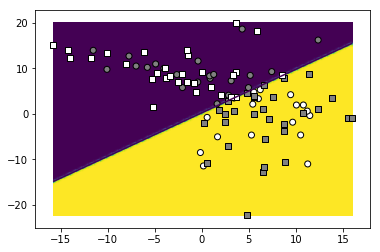

In [16]:
# instantiate the dataset
np.random.seed(100)
X, Y_ = sample_gauss_2d(2, 50)

# train the logistic regression model
w, b = binlogreg_train(X, Y_, param_niter=100)

# evaluate the model on the train set
probs = binlogreg_classify(X, w,b)

# recover the predicted classes Y
Y = np.array(probs > 0.5, dtype=int)

# evaluate and print performance measures
accuracy, recall, precision = eval_perf_binary(Y, Y_)
AP = eval_AP(Y_[probs.argsort()])
print (accuracy, recall, precision, AP)

# graph the decision surface
decfun = binlogreg_decfun(X, w,b)
bbox=(np.min(X, axis=0), np.max(X, axis=0))
graph_surface(decfun, bbox, offset=0.5)

# graph the data points
decfun = binlogreg_decfun(X, w,b)
graph_data(X, Y_, Y)

# show the plot
plt.show()

# 6. Multinomial logistic regression

The final task of the first laboratory exercise is to implement logistic regression which can classify data into any number of classes. You need to implement `logreg_train` that should take in data matrix `X` and a matrix of true class indices `Y_`. The function returns the logistic regression parameters `W` and `b`. The dimensions of those parameters depend on the number of classes `C` which can be determined with the expression `max(Y_) + 1`.

The gradient descent loop should look something like this:

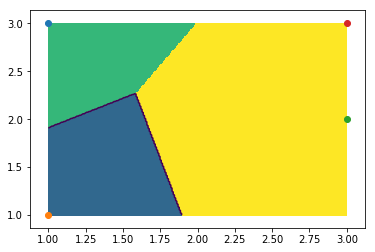

In [273]:
def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))

def logreg_train(X,Y_, param_niter=1000, param_delta=0.1):
    '''
    Arguments
        X:  data, np.array NxD
        Y_: class indices, np.array Nx1
    Return values
        w, b: parameters of binary logistic regression
    '''

    C = max(Y_)+1 # number of classes
    w = np.array([np.random.randn(X.shape[1]) for i in range(C)]) # weights == columns == number of features # CxD
    b = np.array([0.0 for i in range(C)]) # Cx1
    
    # gradient descent (param_niter iteratons)
    for i in range(param_niter):
        # classification scores
        scores = np.dot(X, w.transpose())+b # NxC
        expscores = np.exp(scores) # NxC
        sumexp = [np.sum(s) for s in expscores] # Nx1

        probs = np.array([expscores[i]/v for i,v in enumerate(sumexp)]) # NxC
        #probs = #np.exp(scores)/(1.0+np.exp(scores)) #stable_softmax(scores)# NxC
        logprobs = np.log(probs) # NxC

        # loss
        #loss = sklearn.metrics.log_loss(Y_, probs)# scalar
        # trace
        #if i % int(param_niter/1000) == 0:
        #    print("iteration {}: loss {}".format(i, loss))

        # derivative of the loss funciton with respect to classification scores
        dL_dscores1 = np.array([(probs - Y_) for probs in probs.transpose()]) # N x C
        dL_dscores = probs   # N x C
        dL_dscores[range(len(X)),Y_] -= 1

        # gradijents with respect to parameters
        # X.shape[0] - number of features
        grad_w = 1/(X.shape[0]) * np.dot(dL_dscores.transpose(), X) # D x C
        grad_b = 1/(X.shape[0]) * np.sum(dL_dscores, axis=0) # 1 x C

        # modifying the parameters
        w += -param_delta * grad_w
        b += -param_delta * grad_b
    return (w, b)

def logreg_classify(X, w, b):
    '''
    Parameters
    ----------
    X : 2-D array_like, of shape (N, 2)
        data
    w : 2-D array_like, of shape (C, 2)
        array of weights for each feature
    b: 1-D array like of length C
        bias parameter

    Returns
    -------
    probs : 2-D array_like, of shape (N, C)
        probability of classes for each sample in X
    '''
    
    scores = np.dot(X, w.transpose()) + b    # N x C
    expscores = np.exp(scores)    # N x C

    sumexp = expscores.sum(axis=1)    # N x 1
    return expscores / sumexp.reshape(-1,1)

def logreg_decfun(X, W, b):
    def classify(X):
        return logreg_classify(X, W, b).argmax(axis=1)
    return classify

# instantiate the dataset
np.random.seed(100)
#X, Y_ = sample_gauss_2d(3, 1)
X=np.array([[1,3],[1,1],[3,2], [3,3]]);Y_=np.array([1,0,2,2])
#X=np.array([[1,1],[2,2]]);Y_=np.array([1,0])

# train the logistic regression model
w, b = logreg_train(X, Y_, param_niter=1000)

probs = logreg_classify(X, w, b)
Y = np.argmax(probs, axis=1)

# graph the decision surface
decfun = logreg_decfun(X, w, b)
bbox=(np.min(X, axis=0), np.max(X, axis=0))

graph_surface(decfun, bbox, offset=0.5)
for p in X:
    plt.scatter(p[0], p[1])

plt.show()

Implement the function `logreg_classify` which returns the matrix of dimensitons NxC where each row i contains a posteriori probabilities of possible classes $cj, j∈{0,1,...,C−1}$, for each given data point $x_i$.


In [426]:
def logreg_classify():
    pass

Implement the function `eval_perf_multi(Y,Y_)` which takes-in indices of true classes and indices of predicted classes and based on that calculates: total classification accuracy, [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) (in which the rows represent the true classes and the columns represent the predicted classes) and vectors of precision and recall for [each](http://stats.stackexchange.com/questions/51296/how-to-calculate-precision-and-recall-for-multiclass-classification-using-confus) class. We recommend first calcualting the confusion matrix which you can then use to calculate other measures.


In [427]:
def eval_perf_multi(Y,Y_):
    pass

Implement a decorator for `logreg_classify` which you will pass as an argument to `graph_surface`. to visualize what the classifier has trained. There are several ways to visualize the decision function:

- showing probabilities for each point of the plane for one class
- showing maximum probability of classification regardless of class
- showing the class which has the highest a posteriori probability. 

To test your classifier start with only 2 classes. You should get similar results to the binary classifier. After that, try adding one more class and sampling additional data from the third distribution. Take into account that data from each distribution should be marked as belonging to a separate class.